![women_clothing](images/clothing.jpg)

Welcome to the world of e-commerce, where customer feedback is a goldmine of insights! In this project, you'll dive into the Women's Clothing E-Commerce Reviews dataset, focusing on the 'Review Text' column filled with direct customer opinions.

Your mission is to use text embeddings and Python to analyze these reviews, uncover underlying themes, and understand customer sentiments. This analysis will help improve customer service and product offerings.

## The Data

You will be working with a dataset specifically focusing on customer reviews. Below is the data dictionary for the relevant field:

## womens_clothing_e-commerce_reviews.csv

| Column        | Description                           |
|---------------|---------------------------------------|
| `'Review Text'` | Textual feedback provided by customers about their shopping experience and product quality. |

Armed with access to powerful embedding API services, you will process the reviews, extract meaningful insights, and present your findings.

Let's get started!



## Before you start

In order to complete the project, you may wish to use the OpenAI API. You can create a developer account with OpenAI and store your API key as an environment variable. Instructions for these steps are outlined below.

### Create a developer account with OpenAI

1. Go to the [API signup page](https://platform.openai.com/signup). 

2. Create your account (you'll need to provide your email address and your phone number).

<img src="images/openai-create-account.jpeg" width="200">

3. Go to the [API keys page](https://platform.openai.com/account/api-keys). 

4. Create a new secret key.

<img src="images/openai-new-secret-key.png" width="200">

5. **Take a copy of it**. (If you lose it, delete the key and create a new one.)

### Add a payment method

OpenAI sometimes provides free credits for the API, but it's not clear if that is worldwide or what the conditions are. You may need to add debit/credit card details. 

**The API costs [$0.002 / 1000 tokens](https://openai.com/pricing) for GPT-3.5-turbo. [1000 tokens is about 750 words](https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them). This project should cost less than 1 US cents (but if you rerun tasks, you will be charged every time).**

1. Go to the [Payment Methods page](https://platform.openai.com/account/billing/payment-methods).

2. Click Add payment method.

<img src="images/openai-add-payment-method.png" width="200">

3. Fill in your card details.

### Add an environmental variable with your OpenAI key

1. In Workspace, click on "Environment," in the left sidebar.

2. Click on the plus button next to "Environment variables" to add environment variables.

3. In the "Name" field, type "OPENAI_API_KEY". In the "Value" field, paste in your secret key.

<img src="images/workspace-env-var-details.png" width="500">

4. Click "Create", then you'll see the following pop-up window. Click "Connect," then wait 5-10 seconds for the kernel to restart, or restart it manually in the Run menu.

<img src="images/workspace-connect-integ.png" width="500">

## Load OpenAI API key from environment variables
These variables can be referenced globally throughout the project while keeping their values secret. Good for setting passwords in credentials.

In [79]:
# # Initialize your API key
# import os

# openai_api_key = os.environ["OPENAI_API_KEY"]

## Install useful libraries

In [80]:
# # Update OpenAI to 1.3
# from importlib.metadata import version
# try:
#     assert version('openai') == '1.3.0'
# except:
#     !pip install openai==1.3.0
# import openai

In [81]:
# # Run this cell to install ChromaDB if desired
# try:
#     assert version('chromadb') == '0.4.17'
# except:
#     !pip install chromadb==0.4.17
# try:
#     assert version('pysqlite3') == '0.5.2'
# except:
#     !pip install pysqlite3-binary==0.5.2
# __import__('pysqlite3')
# import sys
# sys.modules['sqlite3'] = sys.modules.pop('pysqlite3')
# import chromadb

## Load the dataset
Load data and perform basic data checks to ensure you are using relevant data for the analysis

In [82]:
# # Load the dataset
# import pandas as pd
# reviews = pd.read_csv("womens_clothing_e-commerce_reviews.csv")

# # Display the first few entries
# reviews.head()

In [83]:
# Start coding here
# Use as many cells as you need.

In [84]:
# # Create an OpenAI client and set your API key
# from openai import OpenAI
# client = OpenAI(api_key=openai_api_key)

## Step 1

In [85]:
# # We're interested in the 'Review Text' column
# review_texts = reviews['Review Text'].dropna().tolist()
# # Remove any NaN values and convert to list

# # Create a request to obtain embeddings
# embeddings = client.embeddings.create(
#     model="text-embedding-ada-002",
#     input=review_texts[:20]  # Processing the first 20 reviews as a batch example
# )

## Step 2

In [86]:
# import numpy as np
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Convert embeddings to a numpy array for PCA
# embedding_array = np.array([emb.embedding for emb in embeddings.data])

# # Apply PCA to reduce to 2 dimensions
# pca = PCA(n_components=2)
# embeddings_2d = pca.fit_transform(embedding_array)

# # Plot the 2D embeddings
# plt.figure(figsize=(10, 8))
# plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
# plt.title('2D PCA of Review Embeddings')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

## Step 3

In [87]:
# from sklearn.metrics.pairwise import cosine_similarity

# # Keywords to categorize feedback
# keywords = ["quality", "fit", "style", "comfort"]
# keyword_embeddings_response = client.embeddings.create(
#     model="text-embedding-ada-002",
#     input=keywords
# )

# # Extract embeddings from the response
# keyword_embeddings = [item.embedding for item in keyword_embeddings_response.data]

# # Calculate cosine similarity between keyword embeddings and review embeddings
# similarities = cosine_similarity(
#     keyword_embeddings,
#     embedding_array
# )

# # Set a threshold for selecting reviews that are relevant to each keyword
# threshold = 0.5  # Adjust this based on your criteria

# # Find and print the reviews that discuss each topic
# for idx, keyword in enumerate(keywords):
#     print(f"Reviews discussing {keyword}:")
#     relevant_reviews = np.where(similarities[idx] > threshold)[0]
#     for review_idx in relevant_reviews:
#         print(f" - {reviews['Review Text'].iloc[review_idx]}")
#     print("\n")

## Step 4

In [88]:
# def find_most_similar_reviews(input_review, all_reviews, all_embeddings, top_n=3):
#     # Embed the input review
#     response = client.embeddings.create(
#         model="text-embedding-ada-002",
#         input=[input_review]
#     )
#     # Extract the embedding properly from the response object
#     input_embedding = response.data[0].embedding  # Use .embedding attribute directly

#     # Calculate cosine similarity between the input embedding and all review embeddings
#     similarities = cosine_similarity([input_embedding], all_embeddings)[0]

#     # Get the indices of the top_n most similar reviews
#     most_similar_indices = np.argsort(similarities)[-top_n:][::-1]

#     # Retrieve the most similar reviews
#     return [all_reviews.iloc[idx] for idx in most_similar_indices]

# # Assuming 'reviews' is your DataFrame and 'embedding_array' contains all review embeddings
# input_review = "Absolutely wonderful - silky and sexy and comfortable"
# most_similar_reviews = find_most_similar_reviews(input_review, reviews['Review Text'], embedding_array)

# # Print or use the most similar reviews
# print(most_similar_reviews)

# Their Solution

In [89]:
# # Import required libraries
# import os
# import openai
# import pandas as pd
# import numpy as np
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import chromadb
# from scipy.spatial import distance
# from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction

# # Initialize your API key
# openai_api_key = os.environ["OPENAI_API_KEY"]

# EMBEDDING_MODEL = "text-embedding-ada-002"

# # Load the dataset
# reviews = pd.read_csv("womens_clothing_e-commerce_reviews.csv")
# review_texts = reviews["Review Text"].dropna()

# # Create and store the embeddings for reviews in one API call
# client = openai.OpenAI(api_key=openai_api_key)
# responses = client.embeddings.create(input=review_texts.tolist(), model=EMBEDDING_MODEL).model_dump()
# embeddings = [response["embedding"] for response in responses["data"]]


# # Apply t-SNE for dimensionality reduction
# def apply_tsne(embeddings):
#     tsne = TSNE(n_components=2, random_state=0)
#     return tsne.fit_transform(embeddings)

# embeddings_2d = apply_tsne(np.array(embeddings))

# # Plotting the results of t-SNE
# def plot_tsne(tsne_results):
#     plt.figure(figsize=(12, 8))
#     for i, point in enumerate(tsne_results):
#         plt.scatter(point[0], point[1], alpha=0.5)
#         plt.text(point[0], point[1], str(i), fontsize=8, verticalalignment='center')
#     plt.title("t-SNE Visualization of Review Embeddings")
#     plt.xlabel("t-SNE feature 1")
#     plt.ylabel("t-SNE feature 2")
#     plt.show()

# plot_tsne(embeddings_2d)

# # Define topics
# categories = ["Quality", "Fit", "Style", "Comfort"]

# # Create embeddings for all categories in one API call
# category_responses = client.embeddings.create(input=categories, model=EMBEDDING_MODEL).model_dump()

# # Extract embeddings from the responses and map them to their respective categories
# category_embeddings = [embedding["embedding"] for embedding in category_responses["data"]]


# # Function to categorize feedback
# def categorize_feedback(text_embedding, category_embeddings):
#     similarities = [{"distance": distance.cosine(text_embedding, cat_emb), "index":i}
#                      for i, cat_emb in enumerate(category_embeddings)]
#     closest = min(similarities, key=lambda x: x["index"])
#     return categories[closest["index"]]

# # Categorize feedback
# feedback_categories = [categorize_feedback(embedding, category_embeddings) for embedding in embeddings]


# # Initialize Chromadb instance for vector storage
# client = chromadb.PersistentClient()

# # Define vector database
# review_embeddings_db = client.create_collection(
#     name="review_embeddings",
#     embedding_function=OpenAIEmbeddingFunction(api_key=openai_api_key))

# # Store embeddings inside vector database
# review_embeddings_db.add(
#     documents=review_texts.tolist(),
#     ids=[str(i) for i in range(len(review_texts))]
# )

# # Function for similarity search using vector db query function
# def find_similar_reviews(input_text, vector_db, n=3):
#     collection = client.get_collection(
#         name="review_embeddings",
#         embedding_function=OpenAIEmbeddingFunction(api_key=openai_api_key))
#     results = collection.query(
#         query_texts=[input_text],
#         n_results=n
#     )
#     return results

# # Example feedback and finding similar feedback
# example_review = "Absolutely wonderful - silky and sexy and comfortable"
# most_similar_reviews = find_similar_reviews(example_review, review_embeddings_db, 3)["documents"][0]
# print(most_similar_reviews)

# # Clean up
# client.delete_collection(name="review_embeddings")

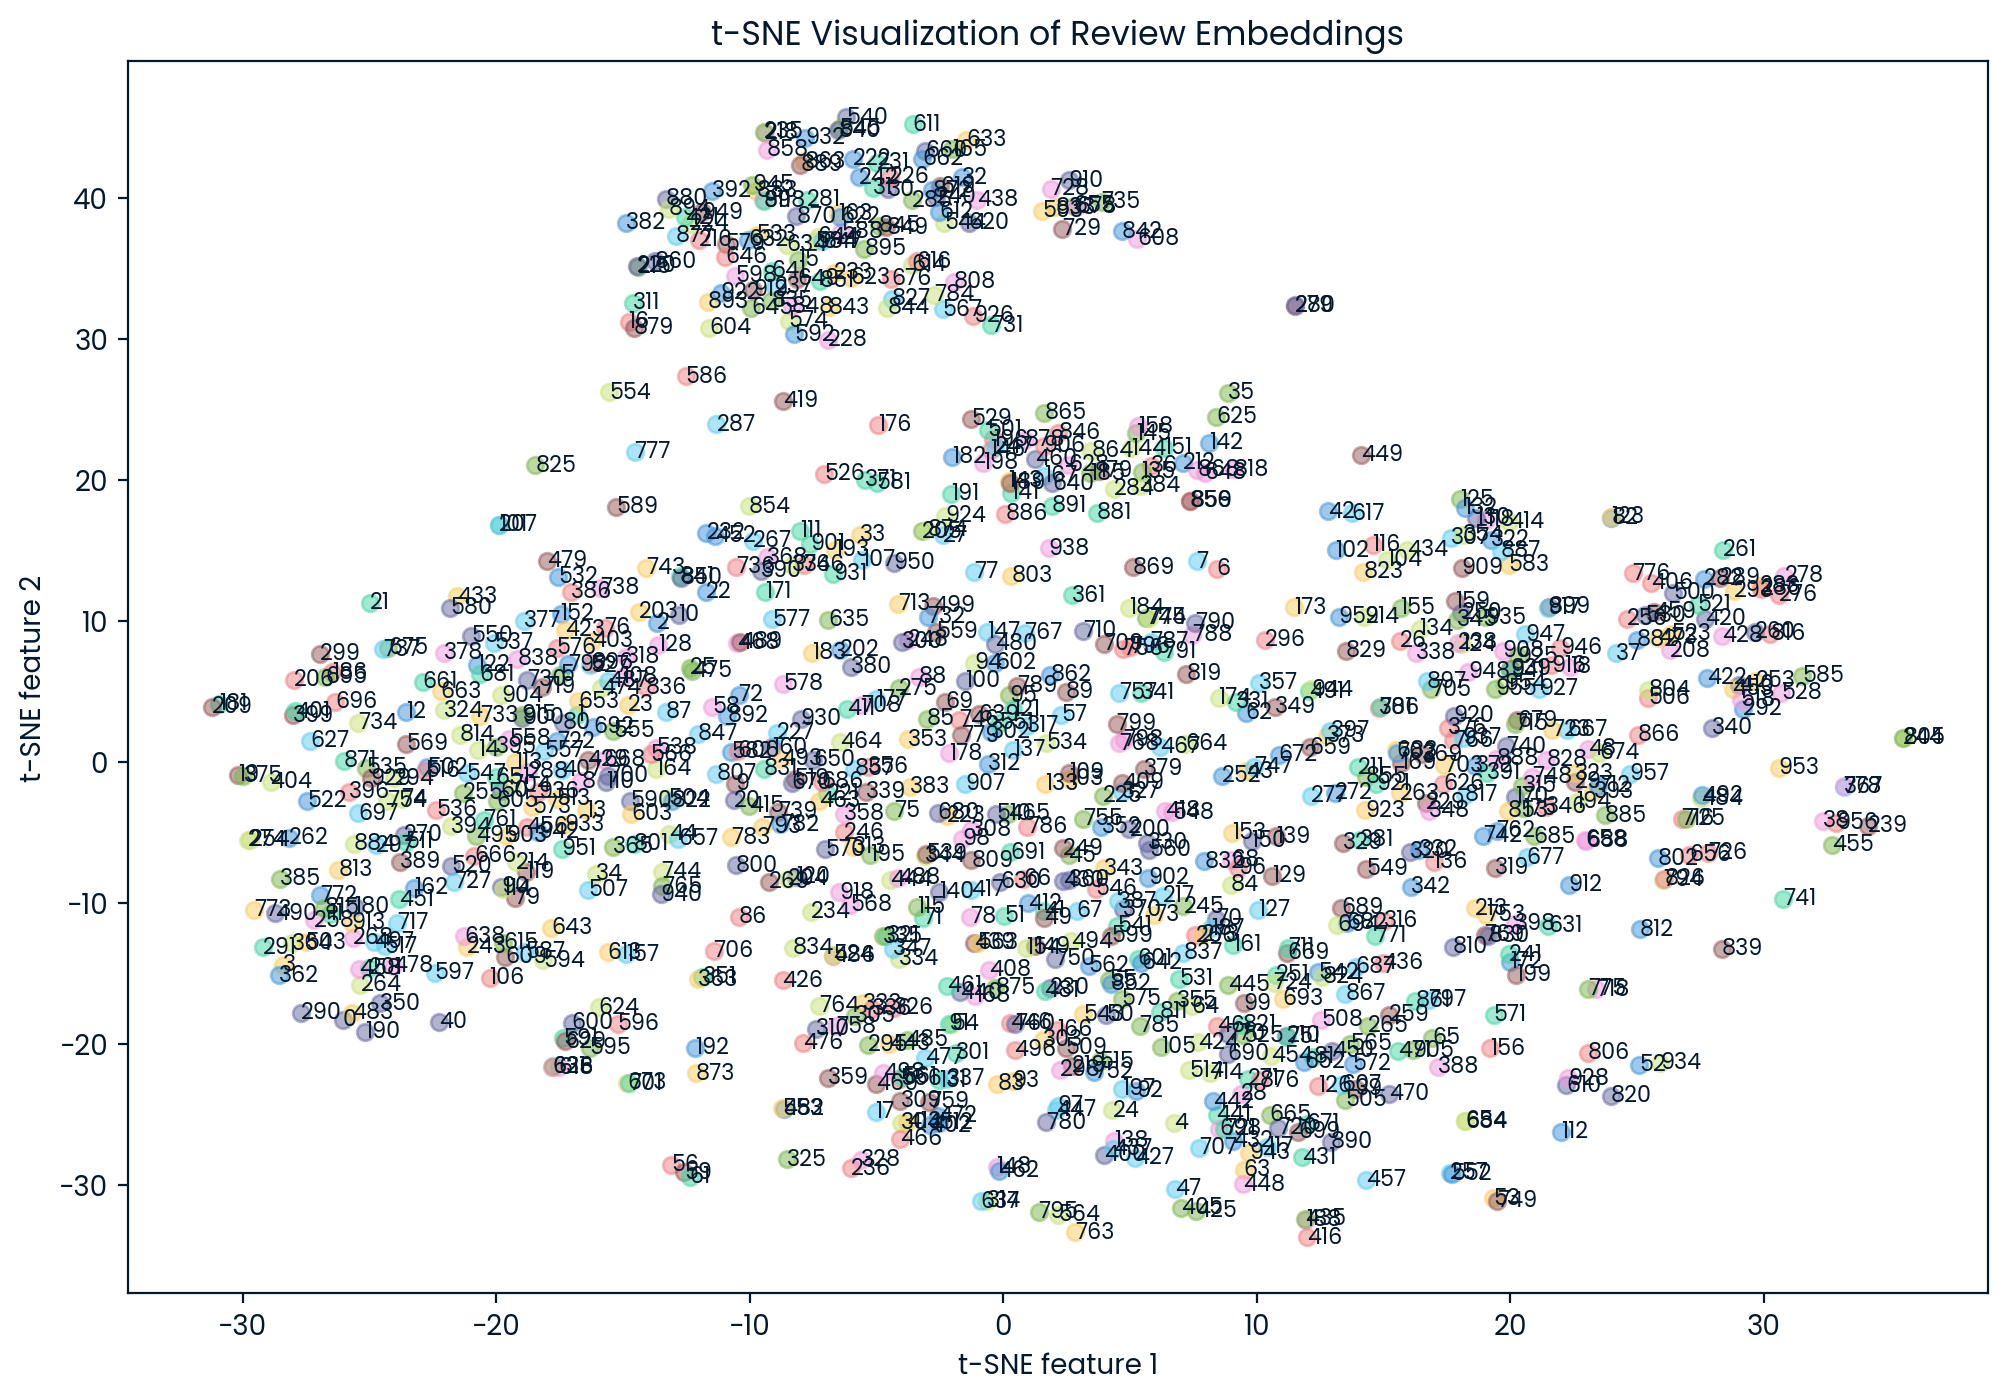

['Absolutely wonderful - silky and sexy and comfortable', "I tried this on in store and since my usual size 6 wasn't available i tried on a 4. it was a little snug in the upper sleeves and shoulders but was lovely otherwise. i passed on it and waited for it to go on sale to order it online. i got it in my usual size 6 but it seemed to me like it was 2 sizes bigger than the 4. i have decided to keep it but i just wasn't thrilled with the fit.", 'Loved this top. great design. comfortable and unique. soft material']


In [90]:
# Issue with chromaDB so trying this:
# Import required libraries
import os
import openai
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

# Initialize your API key
openai_api_key = os.environ["OPENAI_API_KEY"]

EMBEDDING_MODEL = "text-embedding-ada-002"

# Load the dataset
reviews = pd.read_csv("womens_clothing_e-commerce_reviews.csv")
review_texts = reviews["Review Text"].dropna()

# Create and store the embeddings for reviews in one API call
client = openai.OpenAI(api_key=openai_api_key)
responses = client.embeddings.create(input=review_texts.tolist(), model=EMBEDDING_MODEL).model_dump()
embeddings = [response["embedding"] for response in responses["data"]]


# Apply t-SNE for dimensionality reduction
def apply_tsne(embeddings):
    tsne = TSNE(n_components=2, random_state=0)
    return tsne.fit_transform(embeddings)

embeddings_2d = apply_tsne(np.array(embeddings))

# Plotting the results of t-SNE
def plot_tsne(tsne_results):
    plt.figure(figsize=(12, 8))
    for i, point in enumerate(tsne_results):
        plt.scatter(point[0], point[1], alpha=0.5)
        plt.text(point[0], point[1], str(i), fontsize=8, verticalalignment='center')
    plt.title("t-SNE Visualization of Review Embeddings")
    plt.xlabel("t-SNE feature 1")
    plt.ylabel("t-SNE feature 2")
    plt.show()

plot_tsne(embeddings_2d)

# Define topics
categories = ["Quality", "Fit", "Style", "Comfort"]

# Create embeddings for all categories in one API call
category_responses = client.embeddings.create(input=categories, model=EMBEDDING_MODEL).model_dump()

# Extract embeddings from the responses and map them to their respective categories
category_embeddings = [embedding["embedding"] for embedding in category_responses["data"]]


# Function to categorize feedback
def categorize_feedback(text_embedding, category_embeddings):
    similarities = [{"distance": distance.cosine(text_embedding, cat_emb), "index":i}
                     for i, cat_emb in enumerate(category_embeddings)]
    closest = min(similarities, key=lambda x: x["index"])
    return categories[closest["index"]]

# Categorize feedback
feedback_categories = [categorize_feedback(embedding, category_embeddings) for embedding in embeddings]

def find_most_similar_reviews(input_review, all_reviews, all_embeddings, top_n=3):
    # Embed the input review
    response = client.embeddings.create(
        model="text-embedding-ada-002",
        input=[input_review]
    )
    # Extract the embedding properly from the response object
    input_embedding = response.data[0].embedding  # Use .embedding attribute directly

    # Calculate cosine similarity between the input embedding and all review embeddings
    similarities = cosine_similarity([input_embedding], all_embeddings)[0]

    # Get the indices of the top_n most similar reviews
    most_similar_indices = np.argsort(similarities)[-top_n:][::-1]

    # Retrieve the most similar reviews
    return [all_reviews.iloc[idx] for idx in most_similar_indices]

# Assuming 'reviews' is your DataFrame and 'embedding_array' contains all review embeddings
input_review = "Absolutely wonderful - silky and sexy and comfortable"
most_similar_reviews = find_most_similar_reviews(input_review, reviews['Review Text'], np.array(embeddings))

# Print or use the most similar reviews
print(most_similar_reviews)